## Imports

In [5]:
# Data and Visualization

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing, Models ans Metrics

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split


## Data Reading

In [6]:
df = pd.read_csv(r'D:\Projetos Python\Data-Projects\Laptop_price.csv')

## EDA

In [16]:
df.head(10)


,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
5,HP,1.881348,16,256,11.943958,4.840268,9543.719980
6,Lenovo,2.940721,32,256,11.713246,4.344846,10390.137319
7,Lenovo,3.016788,4,256,15.588315,2.941120,9214.484506
8,Lenovo,2.560327,4,512,15.026332,2.743620,16372.175284
9,Acer,3.341111,32,512,13.611945,4.093149,18501.832733


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [13]:
df.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


<Axes: >

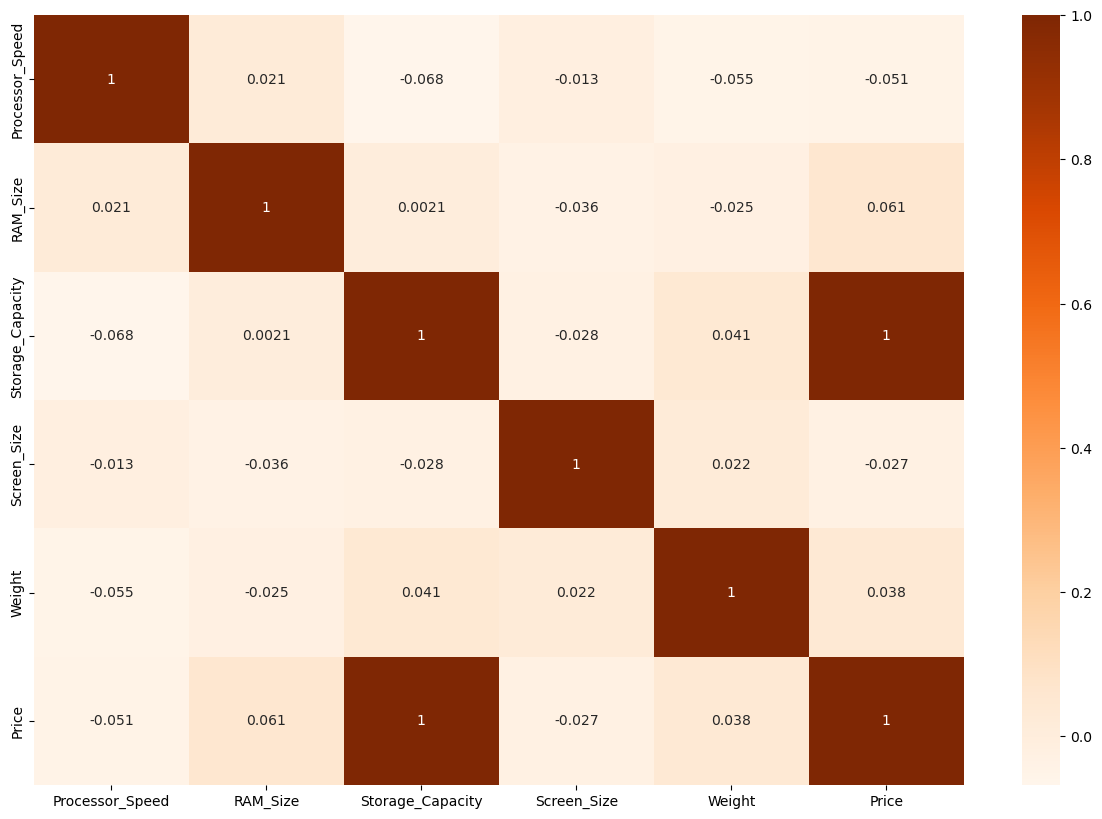

In [15]:
df_1 = df.drop(['Brand'], axis=1)

plt.figure(figsize = (15,10))
sns.heatmap(df_1.corr(), annot=True, cmap = 'Oranges')

In [ ]:
grupo_preço = df['Price'].value_counts()

print(grupo_preço)

In [18]:
ticket=[]

for price in df['Price']:
    if price < 10200:
        ticket.append('Low')
    elif price < 20000:
        ticket.append('Mid')
    else:
        ticket.append('High')

print(ticket)



# df['Ticket'] = 

['Mid', 'High', 'Low', 'Mid', 'High', 'Low', 'Mid', 'Low', 'Mid', 'Mid', 'High', 'Mid', 'Mid', 'Low', 'Low', 'Mid', 'Low', 'Mid', 'Low', 'Low', 'High', 'High', 'High', 'High', 'Low', 'High', 'Low', 'High', 'Mid', 'High', 'High', 'Mid', 'High', 'Mid', 'Low', 'Low', 'High', 'Low', 'Mid', 'Low', 'Mid', 'Mid', 'Mid', 'Mid', 'High', 'Mid', 'Low', 'Low', 'High', 'Mid', 'High', 'Mid', 'Low', 'High', 'High', 'Low', 'High', 'Mid', 'Mid', 'Mid', 'Mid', 'Low', 'High', 'Mid', 'Low', 'High', 'High', 'Low', 'Mid', 'Mid', 'High', 'High', 'Low', 'High', 'Mid', 'High', 'Mid', 'Mid', 'Mid', 'Mid', 'High', 'High', 'Low', 'Mid', 'Mid', 'Mid', 'High', 'Mid', 'Low', 'Mid', 'High', 'High', 'Mid', 'High', 'Low', 'Mid', 'Low', 'Mid', 'High', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'High', 'High', 'Mid', 'High', 'Low', 'High', 'Mid', 'Low', 'Low', 'Mid', 'Low', 'High', 'High', 'Low', 'High', 'Low', 'Mid', 'Low', 'Mid', 'High', 'Mid', 'High', 'Mid', 'High', 'Low', 'Low', 'Mid', 'Mid', 'Mid', 'Mid', 'High', 'High', 'H

In [24]:
tic = pd.DataFrame({'Ticket': ticket})

df_tic = pd.concat([df, tic], axis=1)

display(df_tic)



,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Ticket
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065,Mid
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919,High
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542,Low
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334,Mid
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718,High
...,...,...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017,High
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832,Low
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779,Mid
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459,Low


In [56]:
tick = df_tic.groupby(['Ticket']).count().reset_index().sort_values(by='Ticket')

display(tick)



,Ticket,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,High,336,336,336,336,336,336,336
1,Low,257,257,257,257,257,257,257
2,Mid,407,407,407,407,407,407,407


<Axes: xlabel='Ticket', ylabel='count'>

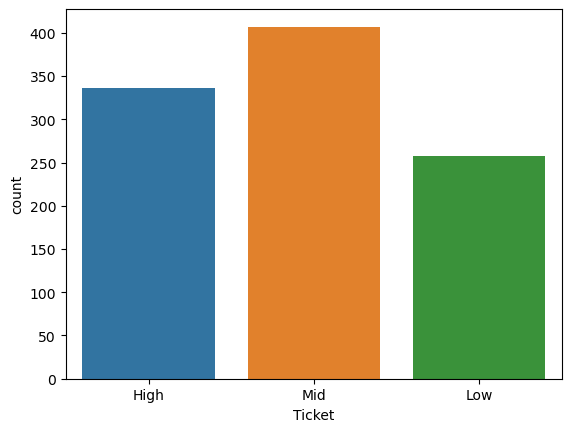

In [60]:
sns.barplot(x=df_tic['Ticket'].value_counts().index, y=df_tic['Ticket'].value_counts(), order= (['High', 'Mid', 'Low']))

<Axes: xlabel='Storage_Capacity', ylabel='count'>

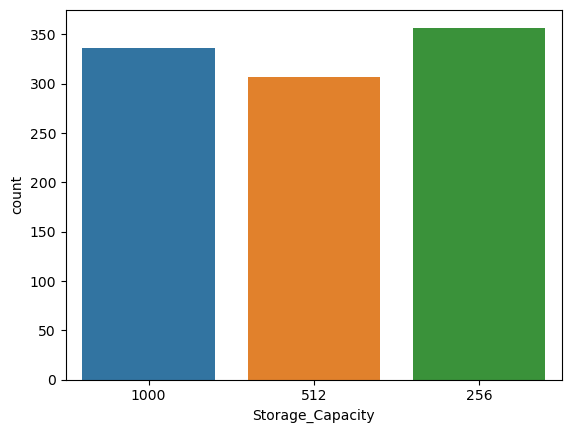

In [64]:
sns.barplot(x=df_tic['Storage_Capacity'].value_counts().index, y=df_tic['Storage_Capacity'].value_counts(), order= ([1000, 512, 256]))

In [34]:
tick = df_tic.groupby(['Storage_Capacity']).count()

display(tick)

,Brand,Processor_Speed,RAM_Size,Screen_Size,Weight,Price,Ticket
Storage_Capacity,,,,,,,
256,357,357,357,357,357,357,357
512,307,307,307,307,307,307,307
1000,336,336,336,336,336,336,336
